# Jupyter notebook: Deep learning with python

## Based on the book by Francois Chollet

Dit is mijn Jupyter notebook gebaseerd op Deep learning with python.

## Installing numpy, keras and tensorflow

In [4]:
!pip install numpy as np

In [6]:
!pip install keras

In [10]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/d1/4f/950dfae467b384fc96bc6469de25d832534f6b4441033c39f914efd13418/astor-0.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c0/4e/fd492e91abdc2d2fcb70ef453064d980688762079397f779758e055f6575/Markdown-3.1.1-py2.py3-none-any.whl
  Created wheel for absl-py: filename=absl_py-0.8.1-cp37-none-any.whl size=121171 sha256=33af9adaab8dbabda88decfc6475ff231f4b0fb791fcc78e487a624e0fae8bb8
  Stored in directory: C:\Users\Michiel\AppData\Local\pip\Cache\wheels\a7\15\a0\0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc
  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-cp37-none-any.whl size=61701 sha256=47feda0aa0ca7a3145814120c4300237249387b61bc4ff4ec2f938fdd9655ad2
  Stored in directory: C:\Users\Michiel\AppData\Local\pip\Cache\wheels\2c\b1\94\43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7546 sha256=55d6766c7bee20b6573e0bc8b318d9f

In [23]:
#2.1 loading the MNIST dataset in Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
#2.2 The network architecture

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## Some Dutch notes

To train the network we must do the following: (part of compilation) 

1) Een loss functie toevoegen.
2) Een optimizer toevoegen
3) Metrics toevoegen om de training en testing te monitoren.

In [11]:
#2.3 The compilation step
network.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [12]:
#2.4 Preparing the Image data

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
                                    
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [13]:
#2.5 preparing the labels
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128) #fit the model to the training data

Epoch 1/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.2539 - accuracy: 0.9261
Epoch 2/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.1024 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.0681 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.0494 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.0372 - accuracy: 0.9891


In [14]:
# now let's fit the model tot the test set
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc=', test_acc)

10000/10000 [==============================] - 1s 122us/step
test_acc= 0.9811000227928162


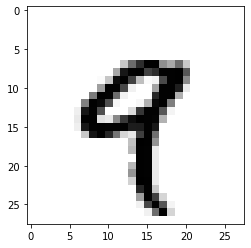

In [24]:
#2.6 Displaying the fourth digit
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary ) #, 
plt.show()